# Covid 19- World Vaccination Progress - EDA

This project is made by me, Hemaksh Swara. For this project, I have taken a dataset from kaggle. The dataset includes records of the covid-19 vaccinations across the world and on this dataset I have performed data analysis using pandas library. Along with this, I have use of matplotlib, seaborn, plotly-express libraries for visualization using various graphs.

Note- Data only till 2021-09-30


## Downloading the Dataset

In [1]:
!pip install opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/gpreda/covid-world-vaccination-progress?select=country_vaccinations_by_manufacturer.csv' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\covid-world-vaccination-progress" (use force=True to force download)


The dataset has been downloaded and extracted.

In [4]:
data_dir = './covid-world-vaccination-progress'

In [5]:
import os
os.listdir(data_dir)

['country_vaccinations.csv', 'country_vaccinations_by_manufacturer.csv']

In [6]:
project_name = "covid-vaccination-progress-eda" 

## Data Preparation and Cleaning

> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data

In [7]:
import pandas as pd
import numpy as np

In [8]:
raw_data=pd.read_csv(data_dir + "/country_vaccinations.csv")

In [9]:
raw_data

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48108,Zimbabwe,ZWE,2021-09-26,5234875.0,3036623.0,2198252.0,16203.0,31405.0,34.69,20.12,14.57,2081.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
48109,Zimbabwe,ZWE,2021-09-27,5263782.0,3050981.0,2212801.0,28907.0,31282.0,34.88,20.22,14.66,2073.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
48110,Zimbabwe,ZWE,2021-09-28,5290317.0,3060086.0,2230231.0,26535.0,29469.0,35.05,20.28,14.78,1953.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
48111,Zimbabwe,ZWE,2021-09-29,5320565.0,3071643.0,2248922.0,30248.0,28149.0,35.25,20.35,14.90,1865.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [10]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48113 entries, 0 to 48112
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              48113 non-null  object 
 1   iso_code                             48113 non-null  object 
 2   date                                 48113 non-null  object 
 3   total_vaccinations                   26332 non-null  float64
 4   people_vaccinated                    24993 non-null  float64
 5   people_fully_vaccinated              22062 non-null  float64
 6   daily_vaccinations_raw               21628 non-null  float64
 7   daily_vaccinations                   47871 non-null  float64
 8   total_vaccinations_per_hundred       26332 non-null  float64
 9   people_vaccinated_per_hundred        24993 non-null  float64
 10  people_fully_vaccinated_per_hundred  22062 non-null  float64
 11  daily_vaccinations_per_milli

In [11]:
raw_data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,2.633200e+04,2.499300e+04,2.206200e+04,2.162800e+04,4.787100e+04,26332.000000,24993.000000,22062.000000,47871.000000
mean,2.172153e+07,9.234341e+06,5.998278e+06,2.587079e+05,1.310687e+05,45.816391,27.632116,20.782706,3535.927618
std,1.236269e+08,3.628087e+07,2.370766e+07,1.300218e+06,8.664519e+05,46.317175,24.940444,22.116300,4386.133709
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.257012e+05,1.760370e+05,8.711375e+04,5.042000e+03,8.950000e+02,5.680000,4.400000,2.520000,529.000000
50%,1.590494e+06,1.049514e+06,6.869110e+05,2.488400e+04,6.881000e+03,28.650000,20.120000,11.545000,2221.000000
75%,8.314824e+06,4.956455e+06,3.587027e+06,1.140095e+05,4.192500e+04,77.765000,48.400000,34.890000,5251.000000
max,2.211452e+09,1.100842e+09,1.047872e+09,2.474100e+07,2.242429e+07,236.050000,118.540000,117.510000,117497.000000


In [12]:
raw_data2=pd.read_csv(data_dir + '/country_vaccinations_by_manufacturer.csv')

In [13]:
raw_data2

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,31099
4,Austria,2021-01-15,Johnson&Johnson,0
...,...,...,...,...
16826,European Union,2021-09-30,Moderna,56980030
16827,European Union,2021-09-30,Oxford/AstraZeneca,67137118
16828,European Union,2021-09-30,Pfizer/BioNTech,398971019
16829,European Union,2021-09-30,Sinopharm/Beijing,2106111


In [14]:
raw_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16831 entries, 0 to 16830
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            16831 non-null  object
 1   date                16831 non-null  object
 2   vaccine             16831 non-null  object
 3   total_vaccinations  16831 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 526.1+ KB


In [15]:
raw_data2.describe()

,total_vaccinations
count,1.683100e+04
mean,1.082024e+07
std,3.686004e+07
min,0.000000e+00
25%,8.046300e+04
50%,7.536510e+05
75%,4.701424e+06
max,3.989710e+08


In [16]:
raw_data.drop(['source_name','source_website'],inplace=True,axis=1)
raw_data['total_vaccinations'].fillna(0, inplace=True)
raw_data['people_vaccinated'].fillna(0, inplace=True)
raw_data['people_fully_vaccinated'].fillna(0, inplace=True)
raw_data['daily_vaccinations_raw'].fillna(0, inplace=True)
raw_data['daily_vaccinations'].fillna(0, inplace=True)
raw_data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [17]:
total_vaccines_df=raw_data.groupby('country')[['daily_vaccinations']].sum()
total_vaccines_df.rename(columns = {'daily_vaccinations':'Total vaccinated'}, inplace = True)

## Exploratory Analysis and Visualization

> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [18]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

C:\Users\91981\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
raw_data['date']=pd.to_datetime(raw_data.date)
raw_data.date

0       2021-02-22
1       2021-02-23
2       2021-02-24
3       2021-02-25
4       2021-02-26
           ...    
48108   2021-09-26
48109   2021-09-27
48110   2021-09-28
48111   2021-09-29
48112   2021-09-30
Name: date, Length: 48113, dtype: datetime64[ns]

Daily Covid Vaccination Graph

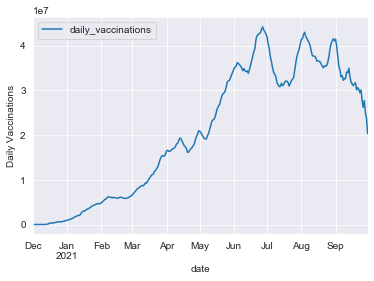

In [20]:
daily_vaccinations_df=raw_data.groupby('date')[['daily_vaccinations']].sum()
daily_vaccinations_df.plot(ylabel='Daily Vaccinations')

Top 10 countries with highest number of vaccinated population

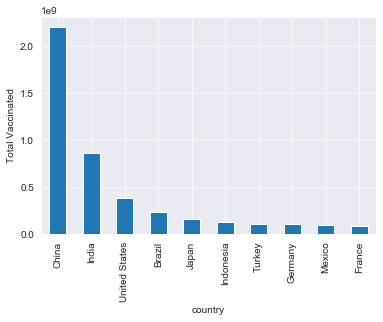

In [21]:
total_vaccines_df.sort_values('Total vaccinated',ascending=False).head(10).plot(kind='bar',legend=False,ylabel='Total Vaccinated',title="")

In [22]:
fully_vaccinated_df=raw_data.groupby('country')[['people_vaccinated','people_fully_vaccinated','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred']].max()
fully_vaccinated_df.drop(['Gibraltar','Pitcairn'],inplace=True)
top10_fv_df=fully_vaccinated_df.sort_values('people_fully_vaccinated_per_hundred',ascending=False).head(10)
top10_fv_df

,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
country,,,,
Portugal,8930596.0,8663808.0,87.83,85.21
United Arab Emirates,9296797.0,8248434.0,93.05,82.56
Malta,420499.0,420429.0,81.72,81.71
Iceland,281734.0,276522.0,82.05,80.53
Spain,37680085.0,36613575.0,80.61,78.33
Cayman Islands,55129.0,51481.0,82.90,77.42
Singapore,4693813.0,4528149.0,79.60,76.79
Qatar,2360308.0,2218292.0,80.54,75.70
Denmark,4454484.0,4369407.0,76.63,75.16


Top 10 countries with highest fully vaccinated per hundred population

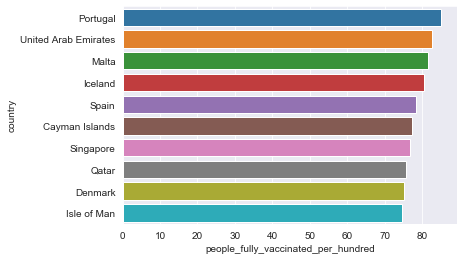

In [23]:
sns.barplot(x='people_fully_vaccinated_per_hundred',y=top10_fv_df.index,data=top10_fv_df)

In [24]:
fully_vaccinated_df["Partially Vaccinated"]=fully_vaccinated_df.people_vaccinated-fully_vaccinated_df.people_fully_vaccinated
fully_vaccinated_df

,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,Partially Vaccinated
country,,,,,
Afghanistan,773002.0,430744.0,1.94,1.08,342258.0
Albania,944011.0,788538.0,32.86,27.45,155473.0
Algeria,6017036.0,4032942.0,13.49,9.04,1984094.0
Andorra,52910.0,43008.0,68.40,55.60,9902.0
Angola,2127405.0,1006732.0,6.27,2.97,1120673.0
...,...,...,...,...,...
Wales,2376313.0,2222830.0,74.96,70.12,153483.0
Wallis and Futuna,5366.0,5072.0,48.37,45.72,294.0
Yemen,308025.0,48148.0,1.01,0.16,259877.0


Countries with least number of partially vaccinated population

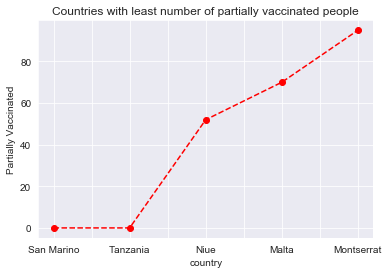

In [25]:
fully_vaccinated_df.drop(['Moldova','Zambia','Bulgaria','Mauritania'],inplace=True)
fully_vaccinated_df.sort_values("Partially Vaccinated").head(5).plot(y="Partially Vaccinated",style='o--r',legend=False,ylabel="Partially Vaccinated",title="Countries with least number of partially vaccinated people")

Graph depicting variation in data of fully vaccinated and partially vaccinated population of 10 random countries

C:\Users\91981\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\91981\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


([<matplotlib.axis.XTick at 0x2eefe651d48>,
 <a list of 10 Text xticklabel objects>)

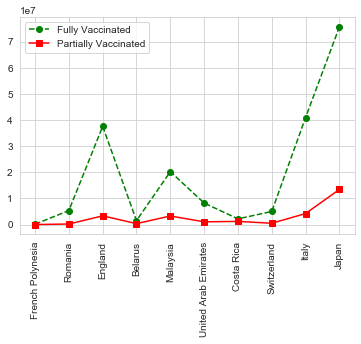

In [26]:
sns.set_style("whitegrid")
sample_df=fully_vaccinated_df.sample(10)
plt.plot(np.arange(0,10), sample_df.people_fully_vaccinated,'g--o',label="Fully Vaccinated")
plt.plot(np.arange(0,10), sample_df['Partially Vaccinated'],'s-r',label="Partially Vaccinated")
plt.legend()
plt.xticks(np.arange(0,10),list(sample_df.index),rotation=90)
#plt.plot(x=np.arange(0,10),y="sample_df.people_fully_vaccinated")
#fully_vaccinated_df.sample(10).plot(y="Partially vaccinated")

## Asking and Answering Questions

#### Name the various covid vaccinations available around the world.

In [27]:
list(raw_data2.vaccine.unique())

['Johnson&Johnson',
 'Moderna',
 'Oxford/AstraZeneca',
 'Pfizer/BioNTech',
 'Sinovac',
 'CanSino',
 'Sputnik V',
 'Sinopharm/Beijing']

#### Which country has the maximum partially vaccinated (1 out of 2 doses taken) population. 

In [28]:
fully_vaccinated_df[fully_vaccinated_df['Partially Vaccinated']==fully_vaccinated_df['Partially Vaccinated'].max()]

,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,Partially Vaccinated
country,,,,,
India,648949043.0,237476249.0,46.57,17.04,411472794.0


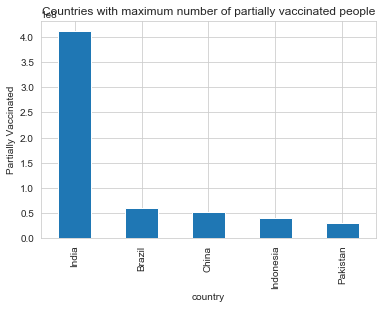

In [29]:
fully_vaccinated_df.sort_values("Partially Vaccinated",ascending=False).head(5).plot(y="Partially Vaccinated",kind='bar',legend=False,ylabel="Partially Vaccinated",title="Countries with maximum number of partially vaccinated people")

#### Which country recorded the highest number of vaccinations in a single day?

In [30]:
raw_data[raw_data.daily_vaccinations==raw_data.daily_vaccinations.max()][['country','date','daily_vaccinations']]

,country,date,daily_vaccinations
8944,China,2021-06-28,22424286.0


#### What all vaccinations are available in United States? Show their usage using a pie chart.

In [31]:
us_df=raw_data2[raw_data2.location=='United States'].groupby("vaccine")[["total_vaccinations"]].max()
list(us_df.index)

['Johnson&Johnson', 'Moderna', 'Pfizer/BioNTech']

(-1.1327829747477054,
 1.2055677064763415,
 -1.2175858106322597,
 1.2273820642696351)

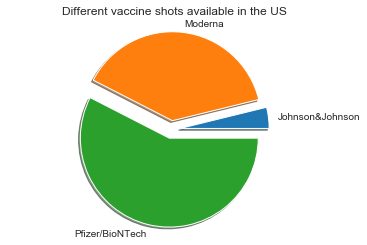

In [32]:
plt.pie(us_df.total_vaccinations,labels=list(us_df.index),explode=[0.1,0.1,0.1],shadow=True)
plt.title("Different vaccine shots available in the US")
plt.axis('equal')

#### Which country has the maximum fully vaccinated people? Is it also the country with the maximum fully vaccinated people per hundred?

In [33]:
list(fully_vaccinated_df[fully_vaccinated_df.people_fully_vaccinated==fully_vaccinated_df.people_fully_vaccinated.max()].index)


['China']

In [34]:
fully_vaccinated_df.people_fully_vaccinated_per_hundred.max()==fully_vaccinated_df.people_fully_vaccinated.max()

False

## Inferences and Conclusion

> - China has vaccinated the highest number of people. It also holds the record of vaccinating the maximum people in a single day
> - Portugal and UAE both are vaccinating its population at a very high rate. They will soon vaccinate 100% of their population and will be the first countries to do so.
> - There are multiple vaccines being used around the world. A lot of different covid vaccines are there and each country has their own set. For eg- Moderna, Pfizer and Johnson&Johnson are the vaccines available in the United States.
> - India is vaccinating its population at a decent pace. But it has a large population of partially vaccinated population (i.e only taken 1 dose out of 2)
> - The rate of daily vaccination was pretty low in the 1st half of 2021, but since June 2021, the rate has picked up. Now, on a daily bases, about 40 million people are getting vaccinated in the whole world


## References and Future Work

Resources:
> - Kaggle
> - Pandas documentation
> - Seaborn and Matplotlib documentation
> - Opendatasets python library
> - Stack Overflow
